# K-Nearest-Neighbors

👇 Load the `houses_clean.csv` dataset located in the `data` folder  
Or you can load it directly from this URL: [https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv).  

The dataset description can be found [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt).

In [2]:
# YOUR CODE HERE
import pandas as pd

df = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv")
df

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
0,0.380070,0.375,0.333333,0.500,1,208500
1,-0.312090,0.375,0.333333,0.875,1,181500
2,0.497489,0.375,0.333333,0.500,1,223500
3,0.390885,0.375,0.333333,0.500,1,140000
4,1.134029,0.500,0.333333,0.500,1,250000
...,...,...,...,...,...,...
1455,0.282735,0.375,0.333333,0.500,1,175000
1456,0.940904,0.375,0.333333,0.625,1,210000
1457,1.353418,0.500,0.333333,1.000,1,266500
1458,-0.596369,0.250,0.333333,0.625,1,142125


💡 Most features are already preprocessed (scaled with normalization), as you did during the Data Preparation day  

💡 One feature, `GrLiveArea`, is not normalized. We keep it that way to see the impact of its normalization on our model performance later on  

👇 You can easily see this with descriptive statistics, check the min and max    

In [3]:
df.describe()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.078410,0.358305,0.348858,0.571918,0.934932,180921.195890
std,0.813952,0.101972,0.073446,0.139100,0.246731,79442.502883
min,-2.263422,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,-0.516802,0.250000,0.333333,0.500000,1.000000,129975.000000
50%,0.000000,0.375000,0.333333,0.500000,1.000000,163000.000000
75%,0.483198,0.375000,0.333333,0.625000,1.000000,214000.000000
max,6.455002,1.000000,1.000000,1.000000,1.000000,755000.000000


# Default KNN

🎯 The task is to predict the price of houses (`SalePrice`) with all the features.

👇 Use cross validation to evaluate a default [KNNRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) on such a task.  
❓ What is the proportion of the variance in `SalePrice` that is explained by the features?  
Save your answer in a variable named `base_knn_score`.

<details>
<summary> 💡 Hint </summary>
    <br>
    ℹ️ The proportion of the variance in the dependent variable that is explained by the independent variables is the R2 score.
</details>

In [4]:
# YOUR CODE HERE
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, r2_score


In [9]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

knn = KNeighborsRegressor()

cv_scores = cross_val_score(knn, X, y, cv=5, scoring='r2')

base_knn_score = cv_scores.mean()
base_knn_score

0.6085640394084016

### 🧪 Check your code

In [10]:
from nbresult import ChallengeResult

result = ChallengeResult('default_score',
                         score = base_knn_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/03-Performance-metrics/data-knn/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_default_score.py::TestDefault_score::test_score PASSED              [100%]

============================== 1 passed in 0.43s ===============================


💯 You can commit your code:

git add tests/default_score.pickle

git commit -m 'Completed default_score step'

git push origin master



In [11]:
! git add tests/default_score.pickle

! git commit -m 'Completed default_score step'

! git push origin master



[master 84c6ebe] Completed default_score step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/default_score.pickle
Enumerating objects: 18, done.
Counting objects: 100% (18/18), done.
Delta compression using up to 4 threads
Compressing objects: 100% (16/16), done.
Writing objects: 100% (18/18), 5.40 KiB | 1.08 MiB/s, done.
Total 18 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (4/4), done.
To github.com:juliensoudet/data-knn.git
 * [new branch]      master -> master


# Scale sensitivity

KNNs and distance-based algorithms can be extremely sensitive to the scale of the features. 

👇 Rescale the feature set within an **exact common range**, and save it under a variable named `X_rescaled`  
Then, evaluate a model on the rescaled features and save its score under variable name `rescaled_score`.

<details>
<summary> 💡 Hint </summary>
    
`MinMaxScaler()`

Even though only `GrLiveArea` needs to be normalized, using the MinxMaxScaler on all your features is fine  
    
Indeed, Min-Max Scaling is an [idempotent](https://en.wikipedia.org/wiki/Idempotence) transformation: if $X_{max}=1$ and $X_{min}=0$, then $X = \frac{X - X_{min}}{X_{max} - X_{min}}$
</details>


In [12]:
# YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

X_rescaled = scaler.fit_transform(X)

knn = KNeighborsRegressor()

cv_scores = cross_val_score(knn, X_rescaled, y, cv=5, scoring='r2')

rescaled_score = cv_scores.mean()
rescaled_score

0.6496841000103444

👉 The R2 score should have increased!

💡 It is preferable for features to be in an exact common range when modeling distance-based algorithms.  
However, it does not always guarantee a better score.  
It is a trial and error process.

### 🧪 Check your code

In [16]:
from nbresult import ChallengeResult

result = ChallengeResult('scale_sensitivity',
                         base_score = base_knn_score,
                         rescaled_features = X_rescaled,
                         rescaled_score = rescaled_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/03-Performance-metrics/data-knn/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_scale_sensitivity.py::TestScale_sensitivity::test_rescaled_features PASSED [ 50%]
test_scale_sensitivity.py::TestScale_sensitivity::test_score_inscrease PASSED [100%]

============================== 2 passed in 0.45s ===============================


💯 You can commit your code:

git add tests/scale_sensitivity.pickle

git commit -m 'Completed scale_sensitivity step'

git push origin master



In [17]:
! git add tests/scale_sensitivity.pickle

! git commit -m 'Completed scale_sensitivity step'

! git push origin master


[master 5d10607] Completed scale_sensitivity step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/scale_sensitivity.pickle
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 9.88 KiB | 2.47 MiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:juliensoudet/data-knn.git
   84c6ebe..5d10607  master -> master


# Optimizing $k$

👇 Fine tune the parameter K (using the parameter `n_neighbors`) of a KNNRegressor on the rescaled features. Plot the evolution of the score as K increases from 1 until 25.

In [19]:
# YOUR CODE HERE
scores = []

for k in range(1, 25):
    knn = KNeighborsRegressor(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_rescaled, y, cv=5, scoring='r2')
    mean_score = cv_scores.mean()
    scores.append(mean_score)


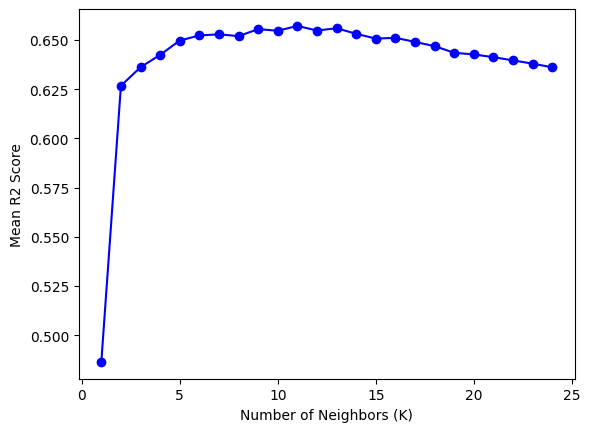

In [21]:
import matplotlib.pyplot as plt
plt.plot(range(1, 25), scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean R2 Score')
plt.show()

❓ Which value of K produces the best performance? Save your answer under variable name `best_k`.

In [25]:
# YOUR CODE HERE
max_r2_score = max(scores)
best_k = scores.index(max_r2_score) +1
best_k

11

<details>
<summary> 👉 Solution 👈</summary>
    
By looking at your graph, you should see that the score stops increasing around k = 5 and the maximum score is reached for k = 11.

</details>



❓ What is you interpretation of the poor performance of the model for values $k$ < 5?

<details>
<summary> 👉 Solution 👈</summary>
    
When K is too small, the model will tend to overfit to the training set. It will focus on too few points to be able to generalize well. Increasing K will give the model more examples to base its predictions on.

</details>



### 🧪 Check your code

In [26]:
from nbresult import ChallengeResult

result = ChallengeResult('optimal_k',
                         optimal_k = best_k)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/03-Performance-metrics/data-knn/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_optimal_k.py::TestOptimal_k::test_optimal_K_around_10 PASSED        [100%]

============================== 1 passed in 0.05s ===============================


💯 You can commit your code:

git add tests/optimal_k.pickle

git commit -m 'Completed optimal_k step'

git push origin master



In [27]:
! git add tests/optimal_k.pickle

! git commit -m 'Completed optimal_k step'

! git push origin master

[master e49ca1b] Completed optimal_k step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/optimal_k.pickle
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 424 bytes | 424.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:juliensoudet/data-knn.git
   5d10607..e49ca1b  master -> master


# Overfitting a KNN 

💡 When the parameter K of KNNs is too small, there is a risk of overfitting the training set and not being able to generalize well. 

👇 Plot the learning curves of a KNN with parameter K=2.

In [30]:
# YOUR CODE HERE
from sklearn.model_selection import learning_curve
import numpy as np

In [34]:
knn = KNeighborsRegressor(n_neighbors=2)

train_sizes = np.linspace(0.1, 1.0, 5)

train_sizes_abs, train_scores, test_scores = learning_curve(knn, X_rescaled, y, train_sizes=train_sizes, cv=5,scoring='r2', shuffle=True, random_state=42)

train_scores_mean = np.mean(train_scores, axis=1)


test_scores_mean = np.mean(test_scores, axis=1)

print (train_scores_mean)
print (test_scores_mean)


[0.79602998 0.85438353 0.85261022 0.85409627 0.86019701]
[0.4906852  0.51483297 0.55336262 0.58722663 0.62383836]


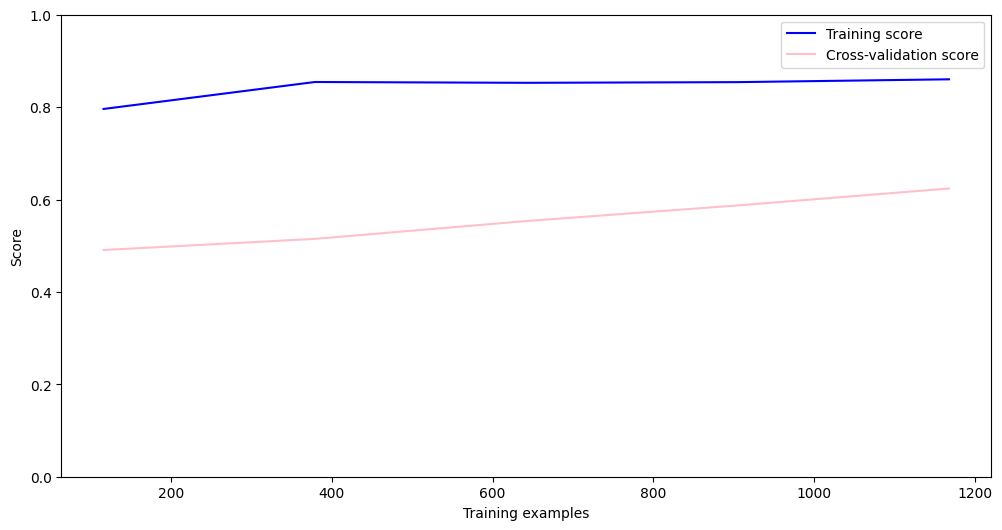

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(train_sizes_abs, train_scores_mean,color="blue",label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, color="pink", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend (loc = 'best')
plt.ylim(0,1)
plt.show()



👉 You should observe a high training score, but a low testing score. ⚠️ Overfitting alert ⚠️ This is due to a parameter K that is too low.

# Ideal K

👇 This time, plot the learning curves for the ideal K value you found in the "Optimizing $k$" section.

In [39]:
# YOUR CODE HERE
knn = KNeighborsRegressor(n_neighbors=11)

train_sizes = np.linspace(0.1, 1.0, 5)

train_sizes_abs, train_scores, test_scores = learning_curve(knn, X_rescaled, y, train_sizes=train_sizes, cv=5,scoring='r2', shuffle=True, random_state=42)

train_scores_mean = np.mean(train_scores, axis=1)


test_scores_mean = np.mean(test_scores, axis=1)

print (train_scores_mean)
print (test_scores_mean)

[0.51833942 0.677339   0.68229815 0.69870665 0.71327436]
[0.47460365 0.60033281 0.62572667 0.64583105 0.65721135]


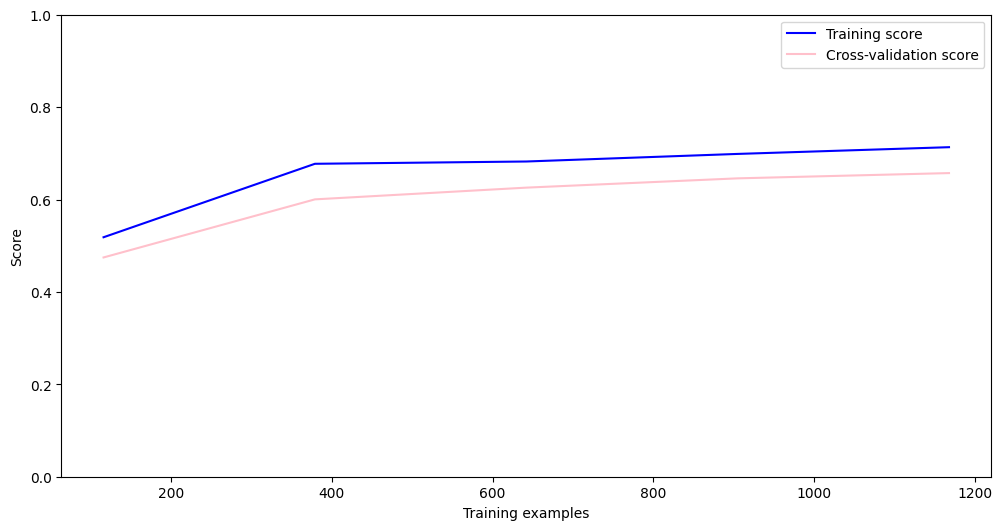

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(train_sizes_abs, train_scores_mean,color="blue",label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, color="pink", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend (loc = 'best')
plt.ylim(0,1)
plt.show()

👉 The curves should be close to converging, which indicates that the model is overfitting less and generalizing better.

In [45]:
optimal_k = 11

💡 There are two key elements to remember when modelling with KNN models:  
    1. Distance-based algorithms are extremely sensitive to the scale of features  
    2. K must be tuned: it controls the tradeoff between performance, generalization, and overfitting

❓ What is the average difference between actual price and predicted price of the optimized KNN model? Compute your answer and save it under variable name `price_error`

<details>
<summary> 💡 Hint </summary>
    
The metric you should calculate is the **Negative Mean Absolute Error (MAE)**.

</details>

In [43]:
# YOUR CODE HERE
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

price_error = mean_absolute_error(y_test, y_pred)
price_error

31300.712017434624

### 🧪 Check your code

In [47]:
from nbresult import ChallengeResult

result = ChallengeResult('price_error',
                         error = price_error)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/03-Performance-metrics/data-knn/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_price_error.py::TestPrice_error::test_price_error_range PASSED      [100%]

============================== 1 passed in 0.42s ===============================


💯 You can commit your code:

git add tests/price_error.pickle

git commit -m 'Completed price_error step'

git push origin master



In [48]:
! git add tests/price_error.pickle

! git commit -m 'Completed price_error step'

! git push origin master


[master 337de2b] Completed price_error step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/price_error.pickle
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 514 bytes | 514.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:juliensoudet/data-knn.git
   e49ca1b..337de2b  master -> master


# Model Selection

❓ Which of those two models would you chose to perform the task of predicting house prices:
- The KNN model you just tuned
- A Linear Regression model

Save your answer as a string under variable name `best_model` as either "KNN" or "LinearReg".

<details>
<summary> 💡 Hint </summary>
    
To chose either or, you'll have to evaluate the score of a Linear Regression on the same task and compare it to the score of the KNN. Make sure you are comparing the same metrics!!

</details>




In [49]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression

💡 When comparing either metric of both models, the KNN model should outperform the Linear Regression. This could be due to its ability to capture non-linear patterns in the data.

In [53]:
linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred_lr = linear.predict(X_test)

r2_score_linear = r2_score(y_test, y_pred_lr)

if r2_score_knn > r2_score_lr:
    best_model = "KNN"
    print (best_model = "KNN")
else:
    best_model = "LinearReg"

### 🧪 Check your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model)
result.write()
print(result.check())

# 🏁